In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
comments = pd.read_csv('E:/DA/1-Youtube_Text_Data_Analysis/GBcomments.csv',error_bad_lines=False)

C:\Users\rashad\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3417: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [39]:
comments.shape

(718452, 4)

In [40]:
comments.columns

Index(['video_id', 'comment_text', 'likes', 'replies'], dtype='object')

## Data pre-processing for textual variables

### Lowercasing

Before we move forward to calculate the sentiment scores for each review it is important to pre-process the textual data. Lowercasing helps in the process of normalization which is an important step to keep the words in a uniform manner

In [55]:
comments['comment_text'][0]

"It's more accurate to call it the M+ (1000) because the price is closer than calling it the X (10)."

In [57]:
comments['comment_text']=comments['comment_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

comments['comment_text'][0]

"it's more accurate to call it the m+ (1000) because the price is closer than calling it the x (10)."

### Special characters

Special characters are non-alphabetic and non-numeric values such as {!,@#$%^ *()~;:/<>\|+_-[]?}. Dealing with numbers is straightforward but special characters can be sometimes tricky. During tokenization, special characters create their own tokens and again not helpful for any algorithm, likewise, numbers.

In [59]:
comments['comment_text']=comments['comment_text'].str.replace('[^\w\s]','')

comments['comment_text'][0]

'its more accurate to call it the m 1000 because the price is closer than calling it the x 10'

In [63]:
comments.isna().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [67]:
comments.dropna(inplace=True)

# Performing Sentiment Analysis on Comments of the video

In [68]:
from textblob import TextBlob

polarity=[]

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [115]:
comments['polarity']=polarity

comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  its more accurate to call it the m 1000 becaus...      0   
1  jt2OHQh0HoQ                  to be there with a samsung phonen      1   
2  jt2OHQh0HoQ  thank gosh a place i can watch it without havi...      0   
3  jt2OHQh0HoQ  what happened to the home button on the iphone...      0   
4  jt2OHQh0HoQ  power is the disease care is the cure keep car...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

# Performing EDA on Positive Comments 

In [79]:
positive_comments=comments[comments['polarity']==1]
positive_comments.shape

(10869, 5)

In [81]:
positive_comments.head()

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  power is the disease care is the cure keep car...      0   
26   jt2OHQh0HoQ            the best thing to ever happen to iphone      0   
80   jt2OHQh0HoQ  apple is always awesome nnhttpsyoutuberftzm6x1yp4      0   
202  T_PuZBdT2iM  power is the disease care is the cure keep car...      0   
206  T_PuZBdT2iM  why do i keep freaking laughing each time i wa...      0   

     replies  polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
202        0       1.0  
206        0       1.0

In [82]:
from wordcloud import WordCloud,STOPWORDS
stopwords=set(STOPWORDS)

In [89]:
positive_comments['comment_text']

4         power is the disease care is the cure keep car...
26                  the best thing to ever happen to iphone
80        apple is always awesome nnhttpsyoutuberftzm6x1yp4
202       power is the disease care is the cure keep car...
206       why do i keep freaking laughing each time i wa...
                                ...                        
718345              this is fuckin awesome best in an world
718390    im just stopping the video three minutes in to...
718416    beating up tommy wiseu was the best part of th...
718440                     tommy wiseau is my greatest fear
718443                                             the best
Name: comment_text, Length: 10869, dtype: object

In [97]:
total_positive_comments=' '.join(positive_comments['comment_text'])

total_positive_comments

'power is the disease care is the cure keep caring for yourself and others as best as you can this is life the best thing to ever happen to iphone apple is always awesome nnhttpsyoutuberftzm6x1yp4 power is the disease care is the cure keep caring for yourself and others as best as you can this is life why do i keep freaking laughing each time i watch it again  even though i know how it will end omg the best  the sonic air timer was perfect no 16 on trending impressive if i could subscribe to dude perfect a million times i would you guys should make dude perfect sceets to be a dude perfect member it is so awesome  dude perfect should do a collab with the slo mo guys the cody trust stort is excellent awesome yay for vlogs so wonderful to see you again this is the best elevator music ive listened to i never thought id say that but this is the best band of all time awesome lauren is perfect omg one of the best rock stars in years this cover is perfect  this is awesome superb i cant stand t

In [108]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_positive_comments)

(-0.5, 999.5, 499.5, -0.5)

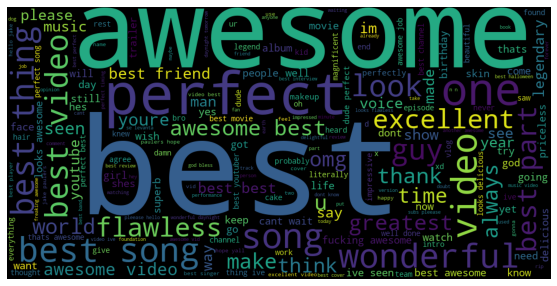

In [109]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Performing EDA on Negative Comments 

(-0.5, 999.5, 499.5, -0.5)

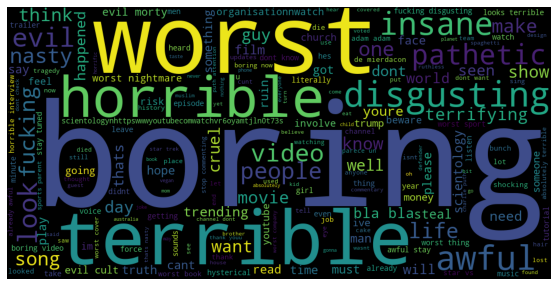

In [110]:
negative_comments=comments[comments['polarity']==-1]
total_negative_comments=' '.join(negative_comments['comment_text'])
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_negative_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Analyzing Tags column to find the Trending Tags in a video

In [117]:
videos=pd.read_csv('E:/DA/1-Youtube_Text_Data_Analysis/USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [119]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [120]:
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [121]:
complete_tags=' '.join(videos['tags'])
complete_tags

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [122]:
import re
tags=re.sub('[^a-zA-Z]',' ',complete_tags)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [124]:
tags=re.sub(' +',' ',tags)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

(-0.5, 999.5, 499.5, -0.5)

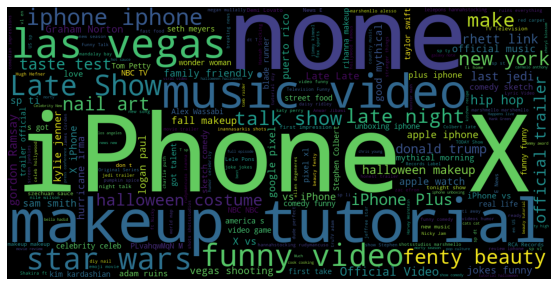

In [126]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Analyzing Likes, Views and Dislikes column to find how they are co-related with each other

Text(0.5, 1.0, 'Regression plot for views & likes')

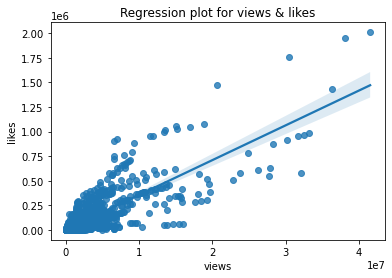

In [127]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views & likes')

Text(0.5, 1.0, 'Regression plot for views & dislikes')

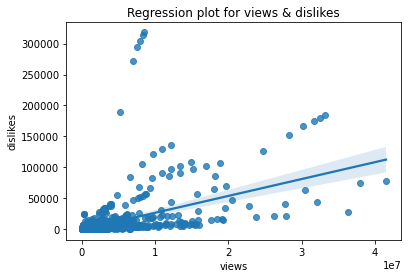

In [128]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for views & dislikes')

In [129]:
df_corr=videos[['views','likes','dislikes']]
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

<AxesSubplot:>

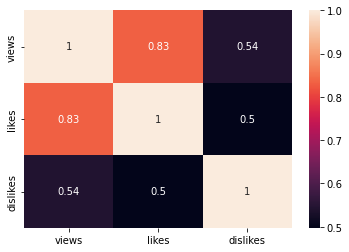

In [131]:
sns.heatmap(df_corr.corr(),annot=True)